# Data Analysis With Python Course

## Module 5 Project 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append(r'C:\\Code\\Python\\HelperFunctions')
from helperFunctions import download_file

file_path= 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'
file_name= 'module_5_auto.csv'
download_file(file_path, file_name)
df = pd.read_csv('module_5_auto.csv')
df.head()

file download successfully to module_5_auto.csv


,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
df = df._get_numeric_data()
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [1]:
import ipywidgets
from ipywidgets import interact, interactive, fixed, interact_manual
import seaborn as sns

In [4]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.show()
    plt.close()

In [5]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [6]:
y_data = df['price']
x_data = df.drop('price', axis=1)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [12]:
def perform_single_lr_split(train_split_percent):
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=train_split_percent, random_state=1)

    print ('\tNumber of test samples: ', x_test.shape[0])
    print ('\tNumber of training samples: ',x_train.shape[0])
    single_lr = LinearRegression()
    x_single_train = x_train[['horsepower']]
    x_single_test = x_test[['horsepower']]
    single_lr.fit(x_single_train, y_train)
    print('\tSingle Feature Test Score:', single_lr.score(x_single_test, y_test))
    print('\tSingle Feature Train Score:', single_lr.score(x_single_train, y_train))
    return single_lr

In [13]:
for percent in range(10, 100, 10):
    print("Train-Test split percentage: ", percent)
    perform_single_lr_split(percent/100)

lr_40 = perform_single_lr_split(0.4)

Train-Test split percentage:  10
	Number of test samples:  21
	Number of training samples:  180
	Single Feature Test Score: 0.36358755750788263
	Single Feature Train Score: 0.6619724197515104
Train-Test split percentage:  20
	Number of test samples:  41
	Number of training samples:  160
	Single Feature Test Score: 0.5699549409405678
	Single Feature Train Score: 0.6719873936874949
Train-Test split percentage:  30
	Number of test samples:  61
	Number of training samples:  140
	Single Feature Test Score: 0.6287485044222195
	Single Feature Train Score: 0.6628063120233265
Train-Test split percentage:  40
	Number of test samples:  81
	Number of training samples:  120
	Single Feature Test Score: 0.6111827529454426
	Single Feature Train Score: 0.6755325771980134
Train-Test split percentage:  50
	Number of test samples:  101
	Number of training samples:  100
	Single Feature Test Score: 0.6622568297614795
	Single Feature Train Score: 0.6488342019292139
Train-Test split percentage:  60
	Number of

In [ ]:
from sklearn.model_selection import cross_val_score
def cross_valuate(num_folds):
    rcross = cross_val_score(lr_40, x_data[['horsepower']], y_data, cv=num_folds)
    print("The mean of the folds are", rcross.mean(), "and the standard deviation is" , rcross.std())
    return(rcross)

In [16]:
for folds in [2, 4, 7, 10]:
    print("Number of folds: ", folds)
    cross_valuate(folds)

Number of folds:  2
The mean of the folds are 0.5166761697127429 and the standard deviation is 0.07348004195771385
Number of folds:  4
The mean of the folds are 0.522009915042119 and the standard deviation is 0.2911839444756029
Number of folds:  7
The mean of the folds are 0.28044292117997166 and the standard deviation is 0.5790564142926513
Number of folds:  10
The mean of the folds are -0.13325055470647149 and the standard deviation is 0.9040136165062753


In [26]:
from sklearn.model_selection import cross_val_predict
def cross_predict(num_folds):
    yhat = cross_val_predict(lr_40, x_data[['horsepower']], y_data, cv=num_folds)
    print("Yhat predicted values: ")
    for value in yhat[0:5]:
        print('\t', value)
    return yhat

In [27]:
for folds in [2, 4, 7, 10]:
    print("Number of folds: ", folds)
    yhat = cross_predict(folds)


Number of folds:  2
Yhat predicted values: 
	 13577.716206404839
	 13577.716206404839
	 19353.866466993924
	 12368.75452395596
	 14115.032509715451
Number of folds:  4
Yhat predicted values: 
	 14141.638075081995
	 14141.638075081995
	 20814.29423472552
	 12745.035623063584
	 14762.350275979068
Number of folds:  7
Yhat predicted values: 
	 14173.734230723707
	 14173.734230723707
	 21152.168597638665
	 12713.131688811276
	 14822.890916018123
Number of folds:  10
Yhat predicted values: 
	 14060.551845795544
	 14060.551845795544
	 21003.545873054878
	 12607.36704939243
	 14706.41175530804


In [28]:
def perform_mutli_lr_split(train_split_percent):
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=train_split_percent, random_state=1)

    print ('\tNumber of test samples: ', x_test.shape[0])
    print ('\tNumber of training samples: ',x_train.shape[0])
    multi_lr = LinearRegression()
    x_single_train = x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
    x_single_test = x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
    multi_lr.fit(x_single_train, y_train)
    print('\tSingle Feature Test Score:', multi_lr.score(x_single_test, y_test))
    print('\tSingle Feature Train Score:', multi_lr.score(x_single_train, y_train))
    return multi_lr

In [30]:
from sklearn.model_selection import train_test_split
for percent in range(10, 100, 10):
    print("Train-Test split percentage: ", percent)
    perform_mutli_lr_split(percent/100)

lr_40m = perform_mutli_lr_split(0.4)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.4, random_state=1)

Train-Test split percentage:  10
	Number of test samples:  21
	Number of training samples:  180
	Single Feature Test Score: 0.6070423045768714
	Single Feature Train Score: 0.8142470221363208
Train-Test split percentage:  20
	Number of test samples:  41
	Number of training samples:  160
	Single Feature Test Score: 0.7429274527307541
	Single Feature Train Score: 0.8197589872626928
Train-Test split percentage:  30
	Number of test samples:  61
	Number of training samples:  140
	Single Feature Test Score: 0.7653276478061931
	Single Feature Train Score: 0.8182115222055624
Train-Test split percentage:  40
	Number of test samples:  81
	Number of training samples:  120
	Single Feature Test Score: 0.7558762473116779
	Single Feature Train Score: 0.8308615776424295
Train-Test split percentage:  50
	Number of test samples:  101
	Number of training samples:  100
	Single Feature Test Score: 0.7898323178571172
	Single Feature Train Score: 0.8242460219696852
Train-Test split percentage:  60
	Number of 

In [31]:
yhat_multi_train = lr_40m.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
print(yhat_multi_train[0:5])
yhat_multi_test = lr_40m.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
print(yhat_multi_test[0:5])

[26091.37901214  7954.34606626 26091.37901214 19557.5951667
  5822.61408773]
[11353.32523898  5751.32764209 11187.28797374  6595.61698627
 15737.79921748]


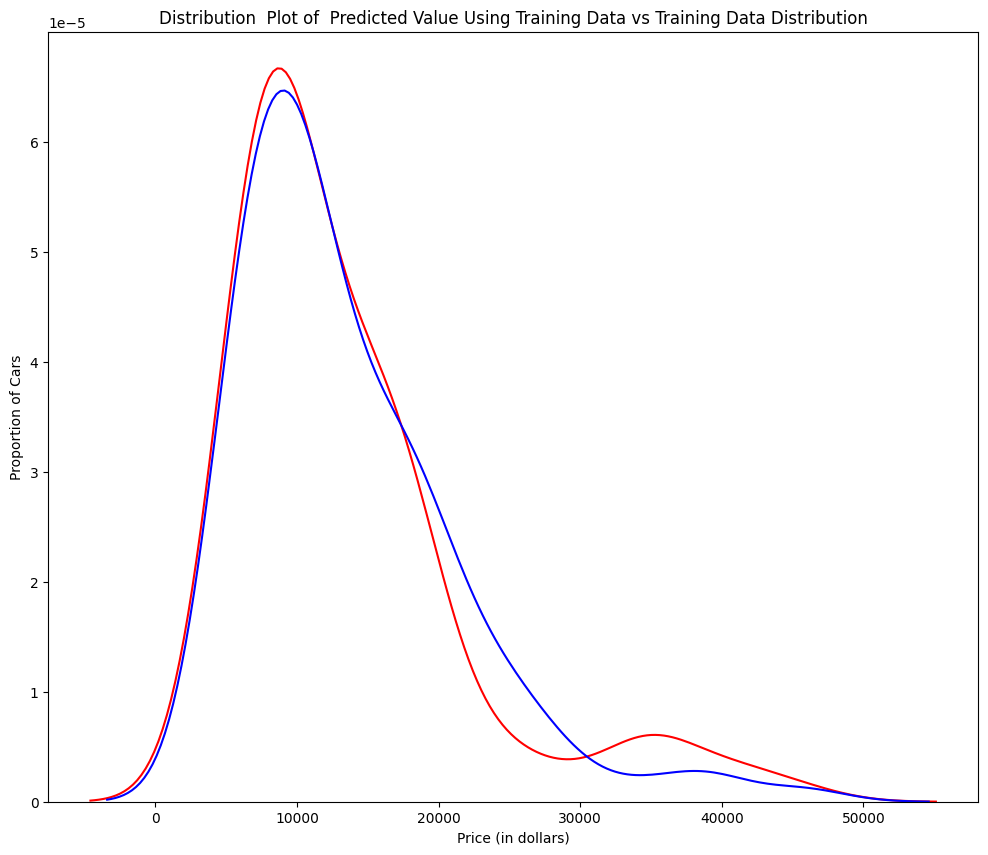

In [34]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_multi_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

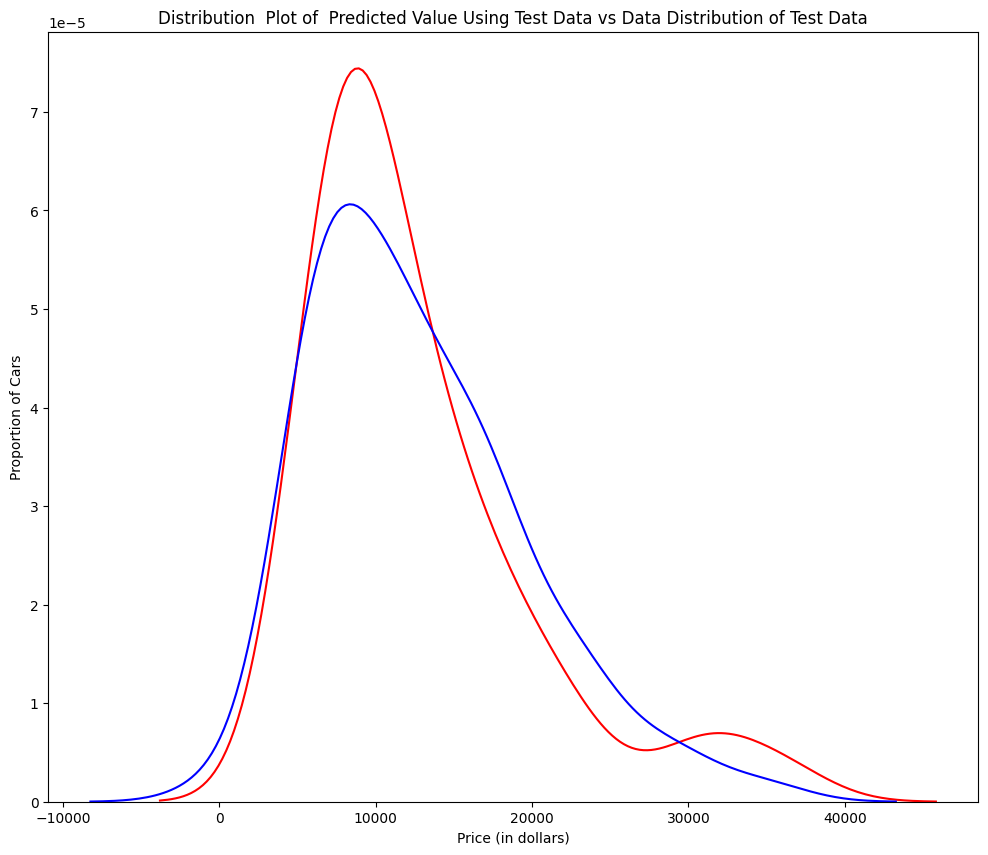

In [33]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_multi_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [ ]:
from sklearn.preprocessing import StandardScaler
def run_pipeline(split_percent):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=split_percent, random_state=1)
    
    pr = PolynomialFeatures(degree=5)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])

    poly = LinearRegression()
    poly.fit(x_train_pr, y_train)

    yhat = poly.predict(x_test_pr)
    print('Train Score:', poly.score(x_train_pr, y_train))
    print('Test Score:', poly.score(x_test_pr, y_test))
    PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)


Train Score: 0.6815282763730004
Test Score: 0.40307268904765026
Train Score: 0.6971664087690717
Test Score: 0.623759196266663


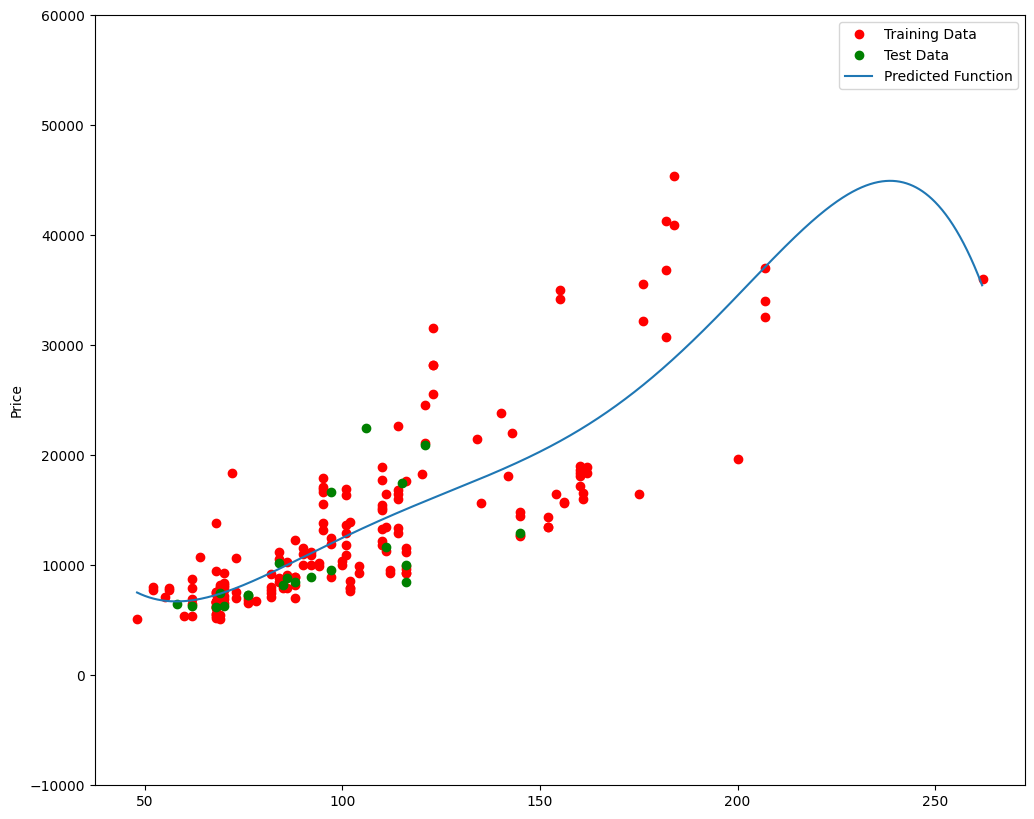

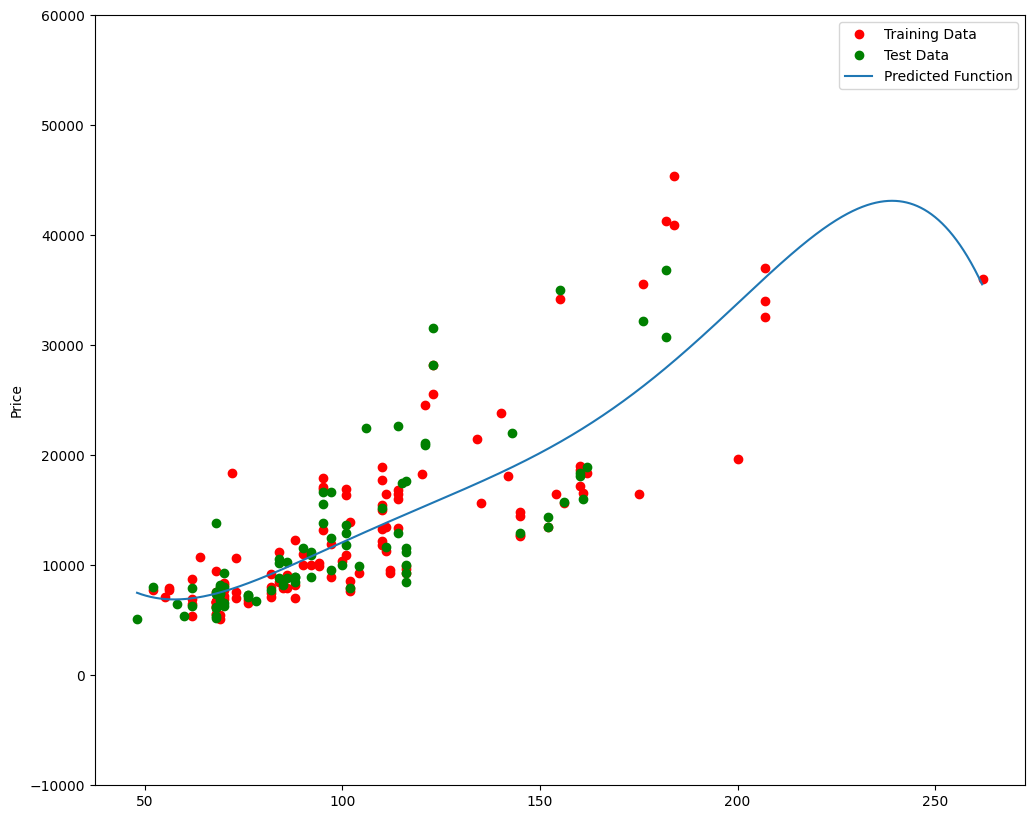

In [46]:
for split_percent in [0.1, 0.4]:
    run_pipeline(split_percent=split_percent)

Text(3, 0.75, 'Maximum R^2 ')

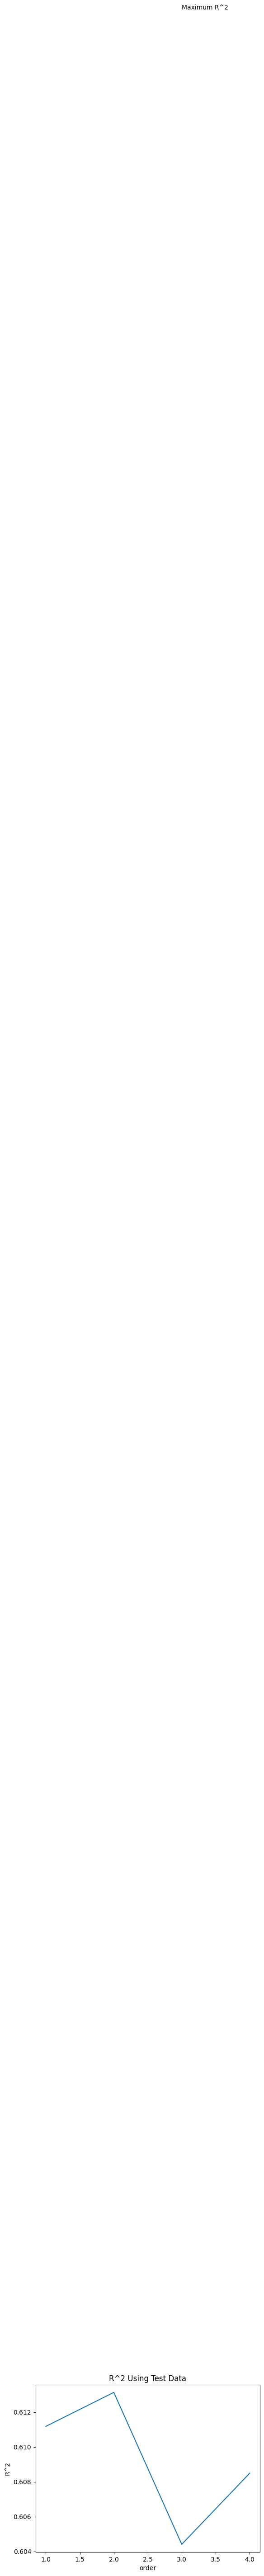

In [49]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    lr = LinearRegression()

    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    

    lr.fit(x_train_pr, y_train)

    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

In [58]:
def run_poly(order, split_percent):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=split_percent, random_state=1)
    
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])

    poly = LinearRegression()
    poly.fit(x_train_pr, y_train)

    # yhat = poly.predict(x_test_pr)
    # print('Polynomial Degree: ', order, ' with Train-Test split percentage: ', split_percent)
    # print('\tTrain Score:', poly.score(x_train_pr, y_train))
    # print('\tTest Score:', poly.score(x_test_pr, y_test))
    PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)


In [59]:
interact(run_poly, order=(0, 6, 1), split_percent=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='spl…

<function __main__.run_poly(order, split_percent)>

In [68]:
def run_multi_poly(order, split_percent):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=split_percent, random_state=1)
    
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
    x_test_pr = pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

    poly = LinearRegression()
    poly.fit(x_train_pr, y_train)

    yhat = poly.predict(x_test_pr)
    DistributionPlot(y_test, yhat, "Actual Values (Test)", "Predicted Values (Test)", "Multi-Feature Polynomial Fit with Degree " + str(order))


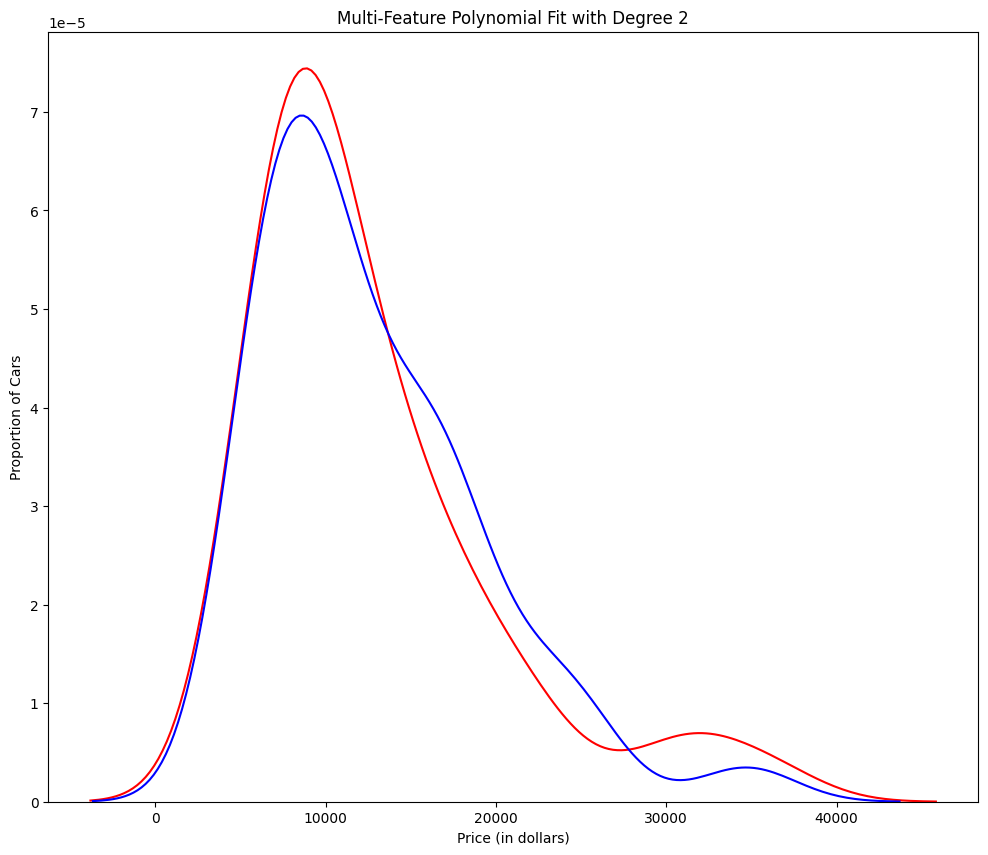

In [ ]:
run_multi_poly(order=2, split_percent=0.4)

In [70]:
from sklearn.linear_model import Ridge
def run_all_poly(order, split_percent, alpha):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=split_percent, random_state=1)
    
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
    x_test_pr = pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

    RidgeModel = Ridge(alpha=alpha)
    RidgeModel.fit(x_train_pr, y_train)

    yhat = RidgeModel.predict(x_test_pr)
    DistributionPlot(y_test, yhat, "Actual Values (Test)", "Predicted Values (Test)", "Multi-Feature Polynomial Fit with Degree " + str(order))


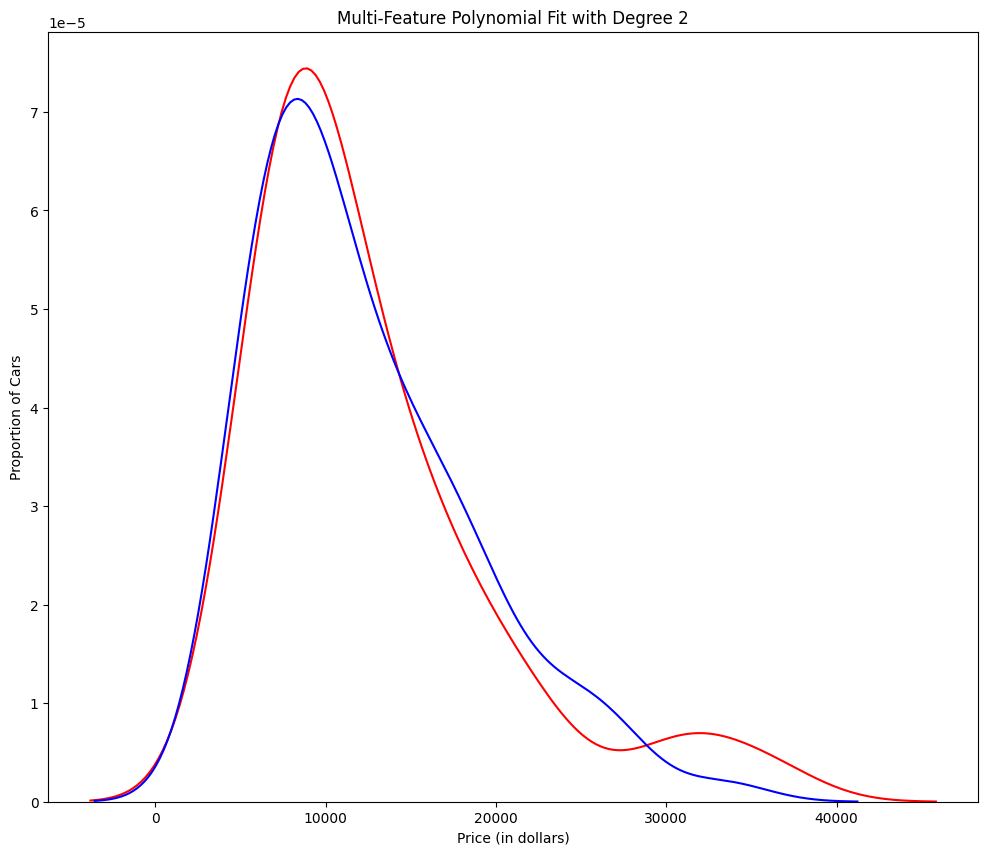

In [77]:
run_all_poly(order=2, split_percent=0.4, alpha=0.1)

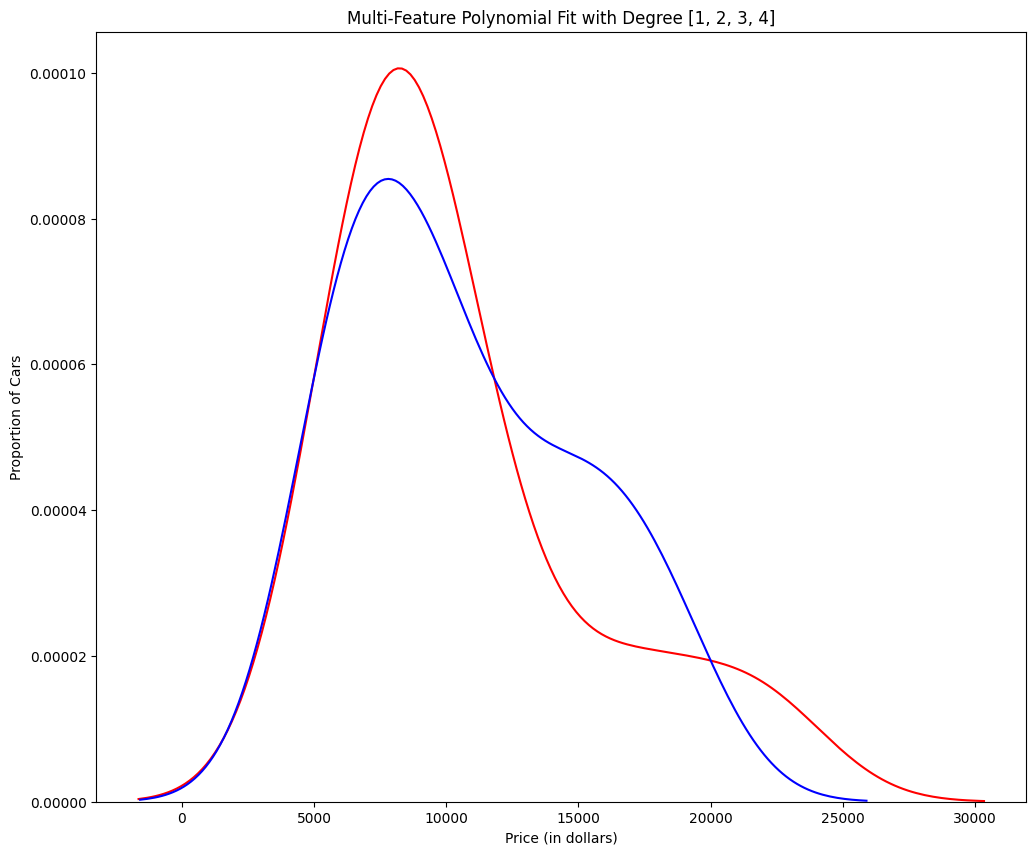

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=1)

pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr = pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

RidgeModel = Ridge(alpha=1)
RidgeModel.fit(x_train_pr, y_train)

yhat = RidgeModel.predict(x_test_pr)
DistributionPlot(y_test, yhat, "Actual Values (Test)", "Predicted Values (Test)", "Multi-Feature Polynomial Fit with Degree " + str(order))


In [91]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RidgeModel = Ridge(alpha=alpha) 
    RidgeModel.fit(x_train_pr, y_train)
    test_score, train_score = RidgeModel.score(x_test_pr, y_test), RidgeModel.score(x_train_pr, y_train)

    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:04<00:00, 243.86it/s, Test Score=0.682, Train Score=0.858]


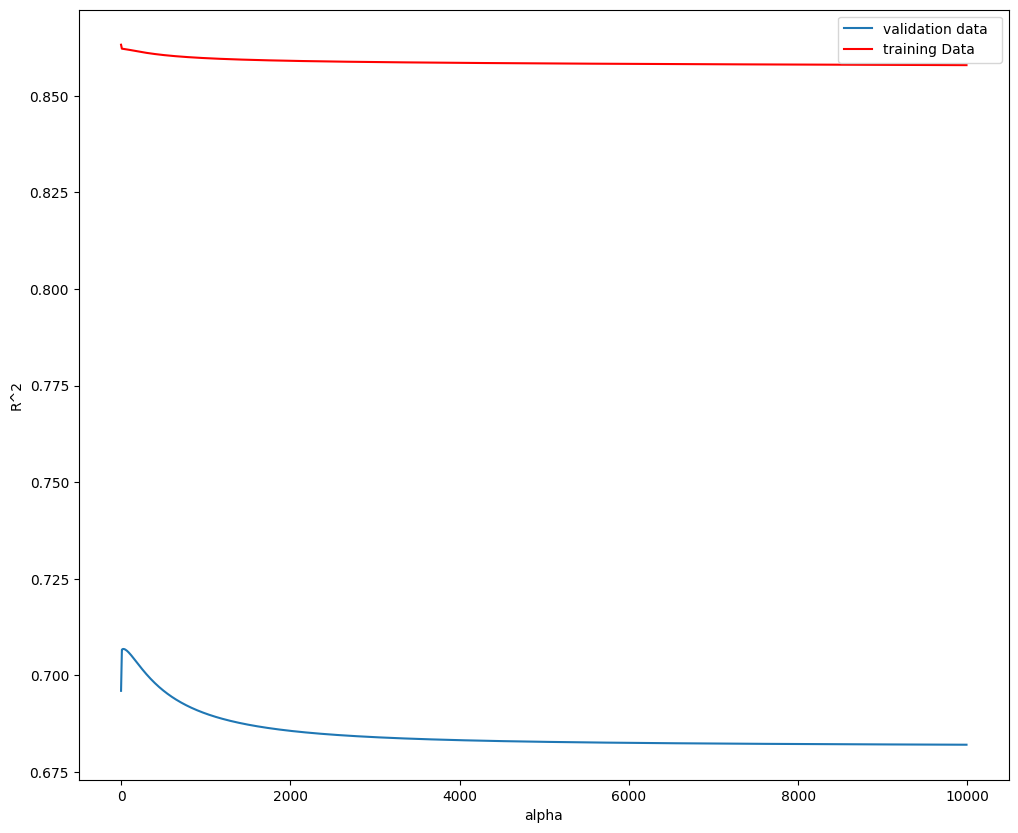

In [92]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [94]:
def runner(alpha):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=1)

    pr = PolynomialFeatures(degree=2)
    x_train_pr = pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
    x_test_pr = pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

    RidgeModel = Ridge(alpha=alpha)
    RidgeModel.fit(x_train_pr, y_train)

    yhat = RidgeModel.predict(x_test_pr)
    DistributionPlot(y_test, yhat, "Actual Values (Test)", "Predicted Values (Test)", "Multi-Feature Polynomial Fit with Degree " + str(order))

def slider():

    Rsqu_test = []
    Rsqu_train = []
    dummy1 = []
    Alpha = 10 * np.array(range(0,1000))
    pbar = tqdm(Alpha)

    for alpha in pbar:
        RidgeModel = Ridge(alpha=alpha) 
        RidgeModel.fit(x_train_pr, y_train)
        test_score, train_score = RidgeModel.score(x_test_pr, y_test), RidgeModel.score(x_train_pr, y_train)

        pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

        Rsqu_test.append(test_score)
        Rsqu_train.append(train_score)
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    plt.plot(Alpha,Rsqu_test, label='validation data  ')
    plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
    plt.xlabel('alpha')
    plt.ylabel('R^2')
    plt.legend()
    

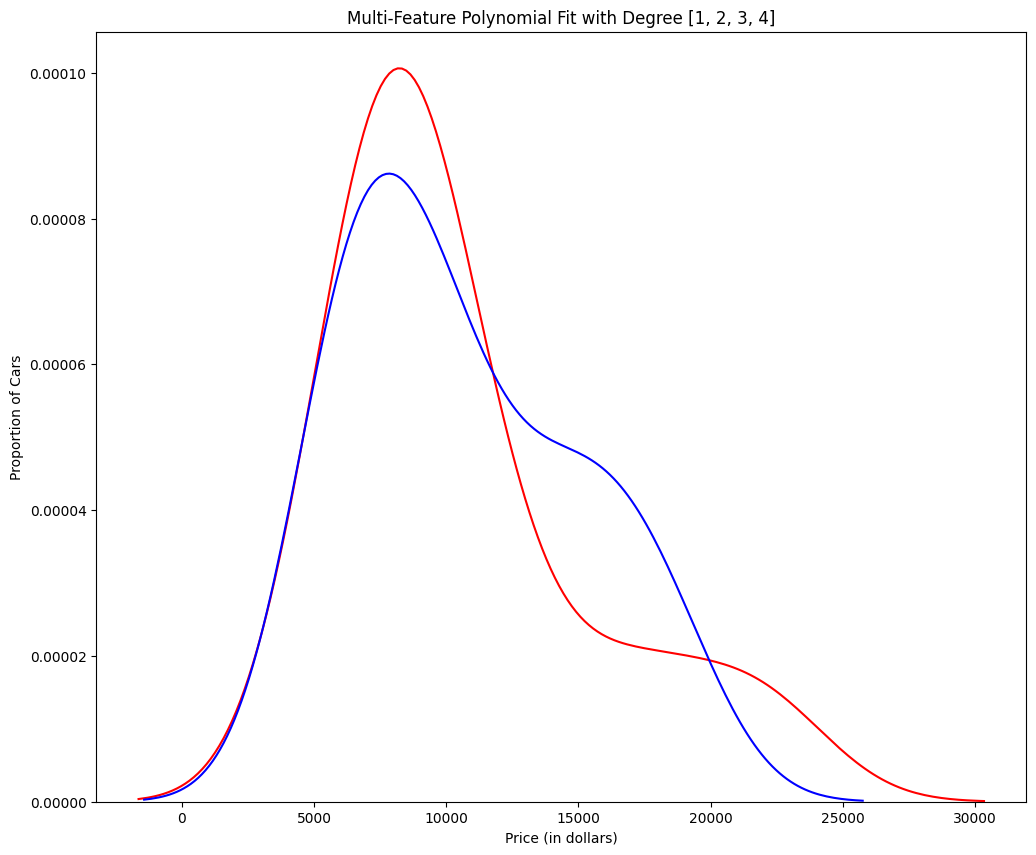

100%|██████████| 1000/1000 [00:03<00:00, 253.26it/s, Test Score=0.682, Train Score=0.858]


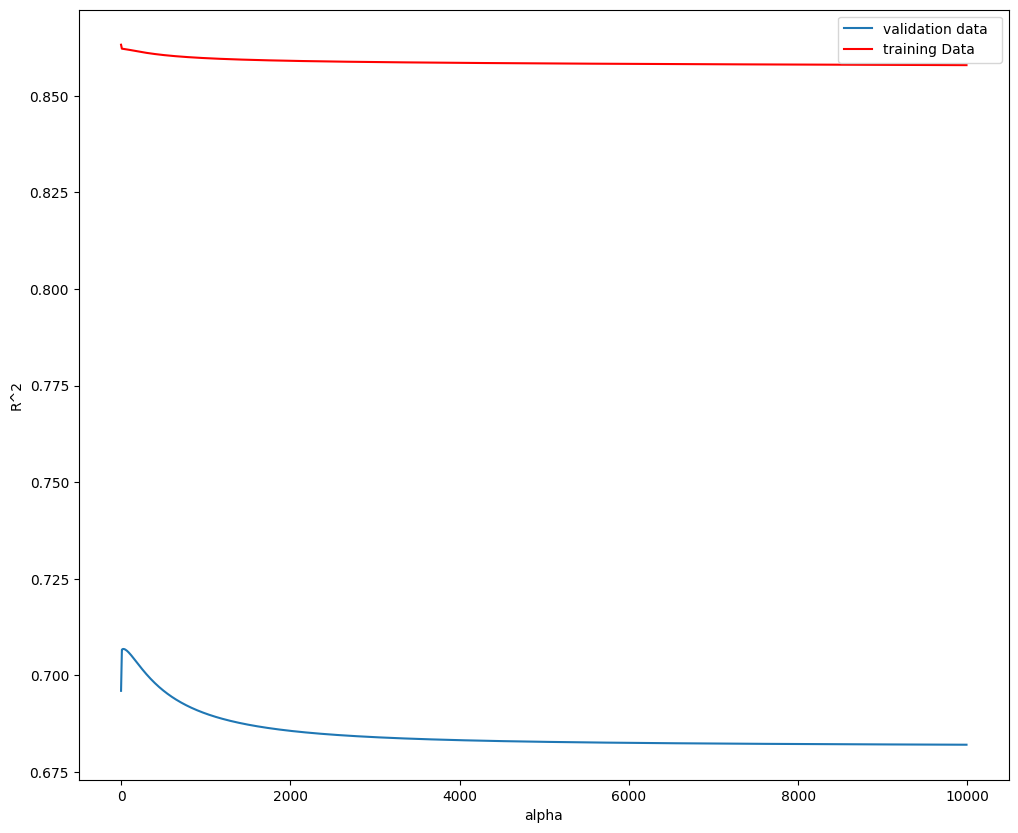

In [97]:
runner(alpha=10)
slider()

In [102]:
from sklearn.model_selection import GridSearchCV

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=1)
parameters = [{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000]}]
RR = Ridge()
Grid1 = GridSearchCV(RR, parameters, cv=4)
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)
BestRR = Grid1.best_estimator_
print(BestRR)
print(BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test))

Ridge(alpha=10000)
0.6373308904159383


In [103]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
parameters = [{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000]}]
RR = Ridge()
Grid1 = GridSearchCV(RR, parameters, cv=4)
Grid1.fit(x_scaled, y_data)
BestRR = Grid1.best_estimator_
print(BestRR)
print(BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test))

Ridge(alpha=100)
-1060270.8670370793


## Module 5 Project 2 ~ Model Evalutaion 2 

In [ ]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

import sys
sys.path.append(r'C:\\Code\\Python\\HelperFunctions')
from helperFunctions import download_file

file_path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv'
file_name= 'laptops.csv'
download_file(file_path, file_name)
df = pd.read_csv('laptops.csv')
df.head()

file download successfully to insurance.csv


,age,gender,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


In [110]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)
df = df._get_numeric_data()
df.head()

,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Screen-Full_HD,Screen-IPS_panel
0,4,2,1,5,14.0,0.551724,8,256,3.52800,978,0,1
1,3,1,1,3,15.6,0.689655,4,256,4.85100,634,1,0
2,3,1,1,7,15.6,0.931034,8,256,4.85100,946,1,0
3,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,0,1
4,4,2,1,7,15.6,0.620690,8,256,4.21155,837,1,0


In [125]:
y_data = df['Price']
x_data = df.drop('Price', axis=1)
def split_data(split_percent):  
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=split_percent, random_state=1)
    return x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test = split_data(0.1)
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [115]:
def cross_valuate(num_folds, linear_model, x_data, y_data):
    rcross = cross_val_score(linear_model, x_data, y_data, cv=num_folds)
    print("The mean of the folds are", rcross.mean(), "and the standard deviation is" , rcross.std())
    return rcross

In [ ]:
for folds in [2, 4, 7, 10]:
    print("Number of folds: ", folds)
    print(f'\t Cross Validation Scores {cross_valuate(folds, linear_model, x_data, y_data)}')

Number of folds:  2
The mean of the folds are 0.3063380347625179 and the standard deviation is 0.0078562794181532
	 Cross Validation Score [0.31419431 0.29848176]
Number of folds:  4
The mean of the folds are 0.23136465591708597 and the standard deviation is 0.334298210928863
	 Cross Validation Score [-0.32759862  0.54392396  0.4117088   0.29742448]
Number of folds:  7
The mean of the folds are 0.30923277758770445 and the standard deviation is 0.28951056003095516
	 Cross Validation Score [-0.24595696  0.30666906  0.63213082  0.47706926  0.44270634  0.5270202
  0.02499073]
Number of folds:  10
The mean of the folds are 0.2570403085827888 and the standard deviation is 0.35720743232604024
	 Cross Validation Score [-0.49372681 -0.19351253  0.33497119  0.60772604  0.68939495  0.39347077
  0.29212391  0.51046964  0.44462276 -0.01513684]


In [117]:
single_linear_model = LinearRegression()
single_linear_model.fit(x_train[['CPU_frequency']], y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [120]:
print(single_linear_model.score(x_test[['CPU_frequency']], y_test))
print(single_linear_model.score(x_train[['CPU_frequency']], y_train))

-0.06599437350393811
0.14829792099817984


In [126]:
x_train, x_test, y_train, y_test = split_data(0.5)
print(len(x_train))
print(len(x_test))

119
119


In [127]:
single_linear_model = LinearRegression()
single_linear_model.fit(x_train[['CPU_frequency']], y_train)
print(single_linear_model.score(x_test[['CPU_frequency']], y_test))
print(single_linear_model.score(x_train[['CPU_frequency']], y_train))

0.028619411720164023
0.16877147625014488


In [128]:
lre = LinearRegression()
Rsqu_test = []
order = [1, 2, 3, 4, 5]
for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train[['CPU_frequency']])
    x_test_pr = pr.fit_transform(x_test[['CPU_frequency']])    
    lre.fit(x_train_pr, y_train)
    Rsqu_test.append(lre.score(x_test_pr, y_test))

Text(0.5, 1.0, 'R^2 Using Test Data')

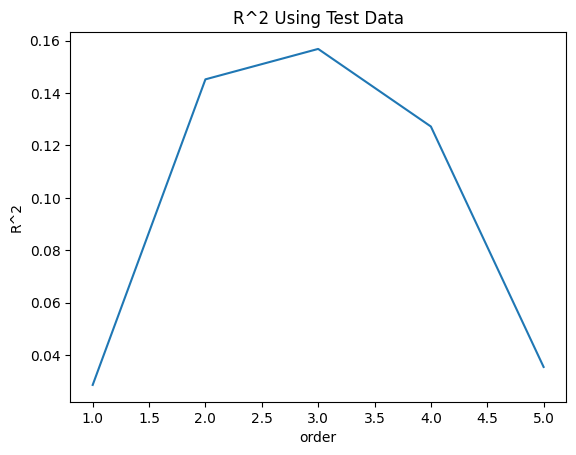

In [129]:
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

In [131]:
x_train, x_test, y_train, y_test = split_data(0.1)
print(len(x_train))
print(len(x_test))

214
24


In [132]:
poly_model = PolynomialFeatures(degree=2)
train_poly_model = poly_model.fit_transform(x_train)
test_poly_model = poly_model.fit_transform(x_test)

In [134]:
Rsqu_test = []
Rsqu_train = []
Alpha = np.arange(0.001,1,0.001)
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(train_poly_model, y_train)
    test_score, train_score = RigeModel.score(test_poly_model, y_test), RigeModel.score(train_poly_model, y_train)
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})
    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 999/999 [00:04<00:00, 231.81it/s, Test Score=0.481, Train Score=0.757]


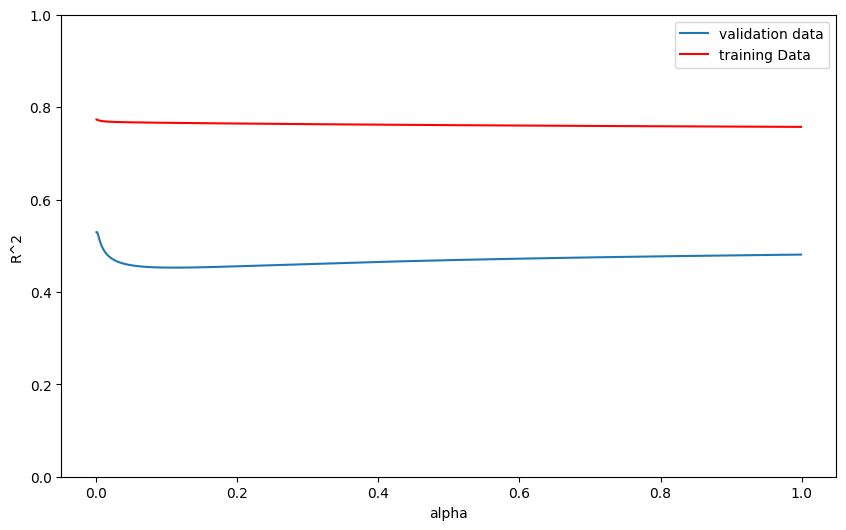

In [135]:
plt.figure(figsize=(10, 6))  
plt.plot(Alpha, Rsqu_test, label='validation data')
plt.plot(Alpha, Rsqu_train, 'r', label='training Data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.ylim(0, 1)
plt.legend()

In [136]:
parameters = [{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}]
RR = Ridge()
Grid1 = GridSearchCV(RR, parameters, cv=4)
Grid1.fit(x_train, y_train)
print(f'Best Alpha: {Grid1.best_estimator_}')
print(f'R2 Score: {Grid1.best_estimator_.score(x_test, y_test)}')

Best Alpha: Ridge(alpha=0.1)
R2 Score: 0.14516067355605589
